3.5


In [11]:
print('Start Code')
'''
~~~
Separate major merger and minor merger runs
~~~
'''

print('Beginning')
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from scipy.signal import argrelextrema
import sklearn.metrics as metrics

from sklearn.preprocessing import LabelEncoder
def dPA_sa(row):
    return row['Delta PA']*row['s_asym']
def dPA_resids(row):
    return row['Delta PA']*row['resids']
def dPA_lambdar(row):
    return row['Delta PA']*row['lambda_r']
def dPA_epsilon(row):
    return row['Delta PA']*row['epsilon']
def dPA_A2(row):
    return row['Delta PA']*row['A_2']
def dPA_deltapos(row):
    return row['Delta PA']*row['deltapos']


def sa_resids(row):
    return row['s_asym']*row['resids']
def sa_lambdar(row):
    return row['s_asym']*row['lambda_r']
def sa_epsilon(row):
    return row['s_asym']*row['epsilon']
def sa_A2(row):
    return row['s_asym']*row['A_2']
def sa_deltapos(row):
    return row['s_asym']*row['deltapos']



def resids_lambdar(row):
    return row['resids']*row['lambda_r']
def resids_epsilon(row):
    return row['resids']*row['epsilon']
def resids_A2(row):
    return row['resids']*row['A_2']
def resids_deltapos(row):
    return row['resids']*row['deltapos']

def lambdar_epsilon(row):
    return row['lambda_r']*row['epsilon']
def lambdar_A2(row):
    return row['lambda_r']*row['A_2']
def lambdar_deltapos(row):
    return row['lambda_r']*row['deltapos']

def epsilon_A2(row):
    return row['epsilon']*row['A_2']
def epsilon_deltapos(row):
    return row['epsilon']*row['deltapos']

def A2_deltapos(row):
    return row['A_2']*row['deltapos']




import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from scipy.signal import argrelextrema
import sklearn.metrics as metrics
  

def plot_confusion_matrix(cm, target_names, title, cmap=plt.cm.summer):
    print('target names', target_names)
    sns.set_style("dark")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    target_names=['Nonmerger','Merger']
    plt.xticks(tick_marks, target_names)#, rotation=45)
    plt.yticks(tick_marks, target_names)
    #plt.tight_layout()
    plt.ylabel('True label', size=20)
    plt.xlabel('Predicted label', size=20)
    
    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    


def lda_classify(v, levels, cutoffpoints):
    for level, cutoff in zip(reversed(levels), reversed(cutoffpoints)):
        if v > cutoff: return level
    return levels[0]




def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
        # plot the shaded range of the confidence intervals
        plt.fill_between(range(mean.shape[0]), ub, lb,
                         color=color_shading, alpha=.5)
        # plot the mean on top
        plt.plot(mean, color_mean)

def group_consecutives(vals, step=1):
    """Return list of consecutive lists of numbers from vals (number list)."""
    run = []
    result = [run]
    expect = None
    for v in vals:
        if (v == expect) or (expect is None):
            run.append(v)
        else:
            run = [v]
            result.append(run)
        expect = v + step
    return result
feature_dict = {i:label for i,label in zip(
                range(12),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                'Delta PA',
                  'v_asym',
                  's_asym',
                  'resids',
                  'lambda_r',
                  'epsilon',
                  'A',
                  'A_2',
                  'deltapos'))}

def locate_min(a):
        smallest = min(a)
        return smallest, [index for index, element in enumerate(a) 
                      if smallest == element]


Start Code
Beginning


In [12]:
''''
~~~
Separate major merger and minor merger runs
~~~
'''

    

list_runs=['fg3_m12_center', 'fg1_m13_rebin','fg3_m13_rebin', 'fg3_m15_rebin', 'fg3_m1_10_rebin','major_all_rebin','minor_all_rebin']
#list_runs=['fg3_m12_highz']
#list_runs=['fg3_m1_10_rebin']#,'fg3_m15']
#list_runs=['minor_all']

colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["orange pink"],sns.xkcd_rgb["baby purple"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["reddish orange"],sns.xkcd_rgb["rich purple"]]
names=['q0.5_fg0.3','q0.333_fg0.1','q0.333_fg0.3','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2','Major Mergers','Minor Mergers']

priors_list=[[0.9,0.1],[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.7,0.3],[0.9,0.1],[0.7,0.3]]

'''list_runs=['all']
colors=[sns.xkcd_rgb["aqua blue"]]
names=['All Combined']
priors_list=[[0.75,0.25]]'''

list_runs=['major_all','minor_all','fg3_m1_10','fg3_m13','fg3_m12','fg3_m15','fg1_m13']
#sns.xkcd_rgb["aqua"],sns.xkcd_rgb["grass green"],sns.xkcd_rgb["dark pink"],sns.xkcd_rgb["greenish blue"]
colors=[sns.xkcd_rgb["dark pink"],sns.xkcd_rgb["greenish blue"],sns.xkcd_rgb["aqua"],sns.xkcd_rgb["orange pink"],sns.xkcd_rgb["red"],sns.xkcd_rgb["grass green"],sns.xkcd_rgb["amber"]]
names=['Major Mergers', 'Minor Mergers','q0.1_fg0.3_BT0.2','q0.333_fg0.3','q0.5_fg0.3','q0.2_fg0.3_BT0.2','q0.333_fg0.1']

priors_list=[[0.9,0.1],[0.7,0.3],[0.7,0.3],[0.9,0.1],[0.9,0.1],[0.7,0.3],[0.9,0.1]]
#priors_list=[[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5]]


list_runs=['fg3_m12', 'fg3_m15']
#sns.xkcd_rgb["aqua"],sns.xkcd_rgb["grass green"],sns.xkcd_rgb["dark pink"],sns.xkcd_rgb["greenish blue"]
colors=[sns.xkcd_rgb["red"], sns.xkcd_rgb["grass green"]]
names=['q0.5_fg0.3', 'q0.2_fg0.3_BT0.2']

priors_list=[[0.9,0.1],[0.7,0.3]]
#priors_list=[[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5]]


#myr_total [2.7399999999999998, 2.7399999999999998, 9.17, 9.17, 9.17, 9.17, 2.6399999999999997, 2.6399999999999997, 2.1999999999999997, 2.1999999999999997, 3.5200000000000005, 3.5200000000000005, 2.83, 2.83]
#LDA_time [2.1800000000000006, 4.31, 3.3099999999999996, 2.1599999999999997, 1.6099999999999999, 3.5200000000000005, 1.7100000000000004]


plt.clf()
missclass_list=[]


LDA_time=[]
myr_total=[]

'''num_comps_list.append(num_comps)
    missclass_list.append(missclass)
    min_comps_list.append(min_comps)
    min_A_list.append(min_A)'''
num_comps_list=[]
missclass_list_1=[]
missclass_list_1_e=[]
min_comps_list=[]
min_A_list=[]

dPA_means_all=[]
va_means_all=[]
color_means_all=[]
sa_means_all=[]
resids_means_all=[]
lambdar_means_all=[]
epsilon_means_all=[]

A2_means_all=[]
deltapos_means_all=[]

dPA_means_all_non=[]
va_means_all_non=[]
color_means_all_non=[]
sa_means_all_non=[]
resids_means_all_non=[]
lambdar_means_all_non=[]
epsilon_means_all_non=[]

A2_means_all_non=[]
deltapos_means_all_non=[]


for i in range(len(list_runs)):
    #i=i+5
    add_on=list_runs[i]
    
    
    
    
        
    run=list_runs[i]

    df = pd.io.parsers.read_table(
        filepath_or_buffer='LDA_kin_center_'+str(run)+'.txt',#'_view_all.txt',#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
        header=[0],
        sep='\t'
        )
    
    
    #df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']

    df.dropna(how="all", inplace=True) # to drop the empty line at file-end


    for j in range(len(df)):
        if df[['Myr']].values[j][0]<0.39:#df[['Myr']].values[i][0]
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#0.39+0.1:#was 0.39
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg1_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:#2.74-2.25+2.74:#was 0.39
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m13' and (df[['Myr']].values[j][0]-2.59) > 0.5:#2.64+0.5
            df.set_value(j,'class label',0)
        if add_on[:7]=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
            df.set_value(j,'class label',0)
        if add_on[:9]=='fg3_m1_10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
            df.set_value(j,'class label',0)
        if add_on[:9]=='major_all':
            #then sort by image name
            if df[['Image']].values[j][0][:7]=='fg3_m12' and (df[['Myr']].values[j][0]-2.15) > 0.5:#q0.5_fg0.3
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg1_m13' and (df[['Myr']].values[j][0]-2.59) > 0.5:
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg3_m13' and (df[['Myr']].values[j][0]-2.74) > 0.5:
                df.set_value(j,'class label',0)
        if add_on[:9]=='minor_all':
            #then sort by image name
            if df[['Image']].values[j][0][:7]=='fg3_m15' and (df[['Myr']].values[j][0]-3.72) > 0.5:
                df.set_value(j,'class label',0)
            if df[['Image']].values[j][0][:7]=='fg3_m10' and (df[['Myr']].values[j][0]-9.17) > 0.5:
                df.set_value(j,'class label',0)
            
    '''if add_on[:7]=='minor_all':
        new_df=df
        file_write=open('LDA_kin_all_combined_minor.txt','w')
        file_write.write('Counter'+'\t'+'Image'+'\t'+'Merger (0 = no, 1 = yes)'+'\t'+
                'Myr'+'\t'+'Viewpoint'+'\t'+'# Bulges'+'\t'+'Sep'+'\t'+'Flux Ratio'+'\t'+'Gini'+'\t'+'M20'+'\t'+'C'+'\t'+'A'+'\t'+'S'+
                        '\t'+'Sersic n'+'\t'+'A_s'+'\n')
        counter=0
        for j in range(len(new_df)):
            file_write.write(str(counter)+'\t'+str(new_df[['Image']].values[j][0])+'\t'+
                            str(new_df[['class label']].values[j][0])+'\t'+
                             str(new_df[['Myr']].values[j][0])+'\t'+
                             str(new_df[['Viewpoint']].values[j][0])+'\t'+
                             str(new_df[['# Bulges']].values[j][0])+'\t'+
                             str(new_df[['Sep']].values[j][0])+'\t'+
                             str(new_df[['Flux Ratio']].values[j][0])+'\t'+
                             str(new_df[['Gini']].values[j][0])+'\t'+
                             str(new_df[['M20']].values[j][0])+'\t'+
                             str(new_df[['Concentration (C)']].values[j][0])+'\t'+
                             str(new_df[['Asymmetry (A)']].values[j][0])+'\t'+
                             str(new_df[['Clumpiness (S)']].values[j][0])+'\t'+
                             str(new_df[['Sersic N']].values[j][0])+'\t'+
                             str(new_df[['Shape Asymmetry']].values[j][0])+'\n')
            counter+=1
        
        
        file_write.close()
        
    if add_on[:7]=='major_all':
        new_df=df
        file_write=open('LDA_kin_all_combined_major.txt','w')
        file_write.write('Counter'+'\t'+'Image'+'\t'+'Merger (0 = no, 1 = yes)'+'\t'+
                'Myr'+'\t'+'Viewpoint'+'\t'+'# Bulges'+'\t'+'Sep'+'\t'+'Flux Ratio'+'\t'+'Gini'+'\t'+'M20'+'\t'+'C'+'\t'+'A'+'\t'+'S'+
                        '\t'+'Sersic n'+'\t'+'A_s'+'\n')
        counter=0
        for j in range(len(new_df)):
            file_write.write(str(counter)+'\t'+str(new_df[['Image']].values[j][0])+'\t'+
                            str(new_df[['class label']].values[j][0])+'\t'+
                             str(new_df[['Myr']].values[j][0])+'\t'+
                             str(new_df[['Viewpoint']].values[j][0])+'\t'+
                             str(new_df[['# Bulges']].values[j][0])+'\t'+
                             str(new_df[['Sep']].values[j][0])+'\t'+
                             str(new_df[['Flux Ratio']].values[j][0])+'\t'+
                             str(new_df[['Gini']].values[j][0])+'\t'+
                             str(new_df[['M20']].values[j][0])+'\t'+
                             str(new_df[['Concentration (C)']].values[j][0])+'\t'+
                             str(new_df[['Asymmetry (A)']].values[j][0])+'\t'+
                             str(new_df[['Clumpiness (S)']].values[j][0])+'\t'+
                             str(new_df[['Sersic N']].values[j][0])+'\t'+
                             str(new_df[['Shape Asymmetry']].values[j][0])+'\n')
            counter+=1
        
        
        file_write.close() '''       

    myr=[]
    myr_non=[]
    for j in range(len(df)):
        if df[['class label']].values[j][0]==0.0:
            myr_non.append(df[['Myr']].values[j][0])
        else:
            myr.append(df[['Myr']].values[j][0])

    myr_non=sorted(list(set(myr_non)))
    myr=sorted(list(set(myr)))



    print('myr', myr)
    print('myr_non', myr_non)
        
    
    
    
    df.dropna(inplace=True) # to drop the empty line at file-end
    

    
    
     
    df['dPA*sa'] = df.apply(dPA_sa,axis=1)
    df['dPA*resids'] = df.apply(dPA_resids,axis=1)
    df['dPA*lambdar'] = df.apply(dPA_lambdar,axis=1)
    df['dPA*epsilon'] = df.apply(dPA_epsilon,axis=1)
    df['dPA*A2'] = df.apply(dPA_A2,axis=1)
    df['dPA*deltapos'] = df.apply(dPA_deltapos,axis=1)
    
    
    df['sa*resids'] = df.apply(sa_resids,axis=1)
    df['sa*lambdar'] = df.apply(sa_lambdar,axis=1)
    df['sa*epsilon'] = df.apply(sa_epsilon,axis=1)
    df['sa*A2'] = df.apply(sa_A2,axis=1)
    df['sa*deltapos'] = df.apply(sa_deltapos,axis=1)
    
    df['resids*lambdar'] = df.apply(resids_lambdar,axis=1)
    df['resids*epsilon'] = df.apply(resids_epsilon,axis=1)
    df['resids*A2'] = df.apply(resids_A2,axis=1)
    df['resids*deltapos'] = df.apply(resids_deltapos,axis=1)
    
    
    df['lambdar*epsilon'] = df.apply(lambdar_epsilon,axis=1)
    df['lambdar*A2'] = df.apply(lambdar_A2,axis=1)
    df['lambdar*deltapos'] = df.apply(lambdar_deltapos,axis=1)
    
    
    df['epsilon*A2'] = df.apply(epsilon_A2,axis=1)
    df['epsilon*deltapos'] = df.apply(epsilon_deltapos,axis=1)
    
    df['A2*deltapos'] = df.apply(A2_deltapos,axis=1)
    
    
    


    
    
    #print(df)
    
    '''First, do a bunch of diagnostic plotting :)'''
    X= df[['Delta PA','v_asym','s_asym', 'resids','lambda_r', 'epsilon','A_2','deltapos']].values
    
    
    dPA = {key:[] for key in myr}
    va = {key:[] for key in myr}
    sa = {key:[] for key in myr}
    resids = {key:[] for key in myr}
    lambdar = {key:[] for key in myr}
    epsilon = {key:[] for key in myr}
    A2 = {key:[] for key in myr}
    deltapos = {key:[] for key in myr}
    
    
    
    dPA_std = {key:[] for key in myr}
    va_std = {key:[] for key in myr}
    sa_std = {key:[] for key in myr}
    resids_std = {key:[] for key in myr}
    lambdar_std = {key:[] for key in myr}
    epsilon_std = {key:[] for key in myr}
    A2_std = {key:[] for key in myr}
    deltapos_std = {key:[] for key in myr}
    

    dPA_non = {key:[] for key in myr_non}
    va_non = {key:[] for key in myr_non}
    sa_non = {key:[] for key in myr_non}
    resids_non = {key:[] for key in myr_non}
    lambdar_non = {key:[] for key in myr_non}
    epsilon_non = {key:[] for key in myr_non}
    A2_non = {key:[] for key in myr_non}
    deltapos_non = {key:[] for key in myr_non}
    

    
        
    color_name_non = {key:[] for key in myr_non}
    color_name = {key:[] for key in myr}
    
    marker_name_non = {key:[] for key in myr_non}
    marker_name = {key:[] for key in myr}


    epsilon_all=[]
    epsilon_all_non=[]
    vasym_all=[]
    vasym_all_non=[]
    
    for l in range(len(df)):
        if df[['class label']].values[l]==0:
            
            epsilon_all_non.append(X[l,5])
            vasym_all_non.append(X[l,1])
            
            dPA_non[df[['Myr']].values[l][0]].append(X[l,0])
            va_non[df[['Myr']].values[l][0]].append(X[l,1])
            sa_non[df[['Myr']].values[l][0]].append(X[l,2])
            resids_non[df[['Myr']].values[l][0]].append(X[l,3])
            lambdar_non[df[['Myr']].values[l][0]].append(X[l,4])
            epsilon_non[df[['Myr']].values[l][0]].append(X[l,5])
            A2_non[df[['Myr']].values[l][0]].append(X[l,6])
            deltapos_non[df[['Myr']].values[l][0]].append(X[l,7])
            
            '''if df[['Image']].values[l][0][:10]=='q0.5_fg0.3' or df[['Image']].values[l][0][:28]=='isolated_galaxies/m0.5_fg0.3':
                color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["red"])
                marker_name_non[df[['Myr']].values[l][0]].append("P")
                #colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["orange pink"],sns.xkcd_rgb["baby purple"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["reddish orange"],sns.xkcd_rgb["rich purple"]]

                    
            else:
                if df[['Image']].values[l][0][:12]=='q0.333_fg0.1' or df[['Image']].values[l][0][:26]=='isolated_galaxies/m1_fg0.1' or df[['Image']].values[l][0][:30]=='isolated_galaxies/m0.333_fg0.1':
                    color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["amber"])
                    marker_name_non[df[['Myr']].values[l][0]].append("s")
                else:
                    if df[['Image']].values[l][0][:16]=='q0.2_fg0.3_BT0.2':
                        color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["baby purple"])
                        marker_name_non[df[['Myr']].values[l][0]].append("o")
                    else:
                        if df[['Image']].values[l][0][:16]=='q0.1_fg0.3_BT0.2' or df[['Image']].values[l][0][:32]=='isolated_galaxies/m1_fg0.3_BT0.2':
                            color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["purple"])
                            marker_name_non[df[['Myr']].values[l][0]].append("p")
                        else:
                            if df[['Image']].values[l][0][:12]=='q0.333_fg0.3' or df[['Image']].values[l][0][:26]=='isolated_galaxies/m1_fg0.3':
                                color_name_non[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["orange pink"])
                                marker_name_non[df[['Myr']].values[l][0]].append("D")
                            else:

                                color_name_non[df[['Myr']].values[l][0]].append('blue')'''
            #color_non[df[['Myr']].values[l][0]].append(df[['']])
            #print('concentration here', df[['Concentration (C)']].values[i][0])
        else:
            epsilon_all.append(X[l,5])
            vasym_all.append(X[l,1])
            
            dPA[df[['Myr']].values[l][0]].append(X[l,0])
            va[df[['Myr']].values[l][0]].append(X[l,1])
            sa[df[['Myr']].values[l][0]].append(X[l,2])
            resids[df[['Myr']].values[l][0]].append(X[l,3])
            lambdar[df[['Myr']].values[l][0]].append(X[l,4])
            epsilon[df[['Myr']].values[l][0]].append(X[l,5])
            A2[df[['Myr']].values[l][0]].append(X[l,6])
            deltapos[df[['Myr']].values[l][0]].append(X[l,7])
            
            '''if df[['Image']].values[l][0][:10]=='q0.5_fg0.3' or df[['Image']].values[l][0][:28]=='isolated_galaxies/m0.5_fg0.3':
                color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["red"])
                
                marker_name[df[['Myr']].values[l][0]].append("P")
                
                    
            else:
                if df[['Image']].values[l][0][:12]=='q0.333_fg0.1' or df[['Image']].values[l][0][:26]=='isolated_galaxies/m1_fg0.1' or df[['Image']].values[l][0][:30]=='isolated_galaxies/m0.333_fg0.1':
                    color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["amber"])
                    marker_name[df[['Myr']].values[l][0]].append("s")
                    
                else:
                    if df[['Image']].values[l][0][:16]=='q0.2_fg0.3_BT0.2':
                        color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["baby purple"])
                        marker_name[df[['Myr']].values[l][0]].append("o")
                        
                    else:
                        if df[['Image']].values[l][0][:16]=='q0.1_fg0.3_BT0.2' or df[['Image']].values[l][0][:32]=='isolated_galaxies/m1_fg0.3_BT0.2':
                            color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["purple"])
                            marker_name[df[['Myr']].values[l][0]].append("p")
                            
                        else:
                            if df[['Image']].values[l][0][:12]=='q0.333_fg0.3' or df[['Image']].values[l][0][:26]=='isolated_galaxies/m1_fg0.3':
                                color_name[df[['Myr']].values[l][0]].append(sns.xkcd_rgb["orange pink"])
                                marker_name[df[['Myr']].values[l][0]].append("D")
                                
                            else:

                                color_name[df[['Myr']].values[l][0]].append('red')'''
    
    '''First show if anything trends more with inclination than with merger vs nonmerger'''
    
    
    plt.clf()
    '''epsilon_all_non.append(X[l,5])
            vasym_all_non.append(X[l,1])'''
    plt.scatter(epsilon_all_non, vasym_all_non, color='blue', label='Nonmergers')
    plt.scatter(epsilon_all, vasym_all, color='red', label='Mergers')
    plt.xlabel('$\epsilon$')
    plt.ylabel('$v_{\mathrm{asym}}$')
    plt.xlim([0,1])
    plt.legend()
    plt.savefig('epsilon_scatter_'+str(run)+'.pdf')
    
   
    
    
    
    
    '''Check for some statistical assumptions'''
    '''Testing for normality with KS'''
    import scipy
    
    df_nonmerg = df[df['class label'] == 0]
    df_merg = df[df['class label'] == 1]
    
    IVS=["Delta PA","s_asym","resids","lambda_r","epsilon","A_2","deltapos"]
    for k in range(len(IVS)):
        print('IV', IVS[k])
        ks_results = scipy.stats.kstest(df_merg.filter([IVS[k]]), cdf='norm')
        shapiro_results = scipy.stats.shapiro(df_merg.filter([IVS[k]]))
        #print('ks_results', ks_results)
        print('SW results', shapiro_results)
        shapiro_results = scipy.stats.shapiro(df_nonmerg.filter([IVS[k]]))
        #print('ks_results', ks_results)
        print('SW results', shapiro_results)
        
    '''Test for non-homogeneity of variance-covariance matrices'''
    sample1=df_nonmerg.loc[:,"Delta PA":"deltapos"]
    #df_nonmerg["Gini","M20","Concentration (C)","Asymmetry (A)","Clumpiness (S)","Sersic N","Shape Asymmetry"]
    sample2=df_merg.loc[:,"Delta PA":"deltapos"]
    #df_merg["Gini","M20","Concentration (C)","Asymmetry (A)","Clumpiness (S)","Sersic N","Shape Asymmetry"]
    print('shape sample1', np.shape(sample1), 'shape sample2', np.shape(sample2))
    
    
    plt.clf()
    from sci_analysis import analyze
    '''np.random.seed(987654321)
    data = scipy.stats.norm.rvs(size=1000)
    analyze(data)
    plt.show()'''
    
    '''Can use this to test if data is normally distributed'''
    
    '''plt.clf()
    analyze(df['Gini'],
        groups=df['class label'],
        categories='class label',
        name='Column Two',
        title='Oneway from pandas')
    
    plt.clf()
    analyze((df['Gini']-np.mean(df['Gini']))/np.std(df['Gini']),
        groups=df['class label'],
        categories='class label',
        name='Column Two',
        title='Oneway from pandas')
    
    
    
    
    analyze(df['M20'],
        groups=df['class label'],
        categories='class label',
        name='Column Two',
        title='Oneway from pandas')
    analyze(df['Concentration (C)'],
        groups=df['class label'],
        categories='class label',
        name='Column Two',
        title='Oneway from pandas')
    analyze(df['Asymmetry (A)'],
        groups=df['class label'],
        categories='class label',
        name='Column Two',
        title='Oneway from pandas')
    analyze(df['Clumpiness (S)'],
        groups=df['class label'],
        categories='class label',
        name='Column Two',
        title='Oneway from pandas')
    analyze(df['Sersic N'],
        groups=df['class label'],
        categories='class label',
        name='Column Two',
        title='Oneway from pandas')
    analyze(df['Shape Asymmetry'],
        groups=df['class label'],
        categories='class label',
        name='Column Two',
        title='Oneway from pandas')'''
    '''plt.clf()
    analyze(df['Gini'],df['class label'],
        name='Column Two',
        title='Oneway from pandas')
    
    plt.clf()
    analyze({'Gini':df['Gini'],'M20':df['M20'],'Concentration':df['Concentration (C)'],
             'Asymmetry':df['Asymmetry (A)'],'Clumpiness':df['Clumpiness (S)'],
             'Sersic':df['Sersic N'],'Shape Asymmetry':df['Shape Asymmetry']},
            df['class label'],
            groups=df['class label'],
            categories='class label',
            name='Column Two',
            title='Oneway from pandas')
    
    plt.clf()
    analyze([df_nonmerg['Gini'], df_merg['Gini']],
        groups=['Nonmerg', 'Merg'],
        categories='Columns',
        title='Unstacked Oneway')'''
    
    '''for k in range(len(IVS)):
        print('ZSCORE', IVS)
        print(scipy.stats.zscore(df.filter([IVS[k]])))'''

    
    
    
    '''Now I would love to run some OLS to find R^2 values etc'''
    from sklearn import datasets, linear_model, feature_selection
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.model_selection import train_test_split
    
    
    
    '''if add_on[:9]=='major_all' or add_on[:9]=='minor_all':
        
        y = df['class label'].values
    
    
        X= df[['Delta PA','s_asym', 'resids','lambda_r', 'epsilon','A_2']].values
        std_scale = preprocessing.StandardScaler().fit(X)
        X = std_scale.transform(X)

        enc = LabelEncoder()
        label_encoder = enc.fit(y)
        y = label_encoder.transform(y) + 1
        label_dict = {1: 'Nonmerger', 2: 'Merger'}
        
        plt.clf()
        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,20))
        sns.axes_style("white")
        if add_on[:9]=='major_all':
            fig.suptitle('Major Mergers', fontsize=40)
        if add_on[:9]=='minor_all':
            fig.suptitle('Minor Mergers', fontsize=40)
        #axes[0][0].annotate('All Minor Mergers', size=40, xy=(0.02,0.9),xycoords='axes fraction')

        for ax,cnt in zip(axes.ravel(), range(6)):  
            
            min_b = math.floor(np.min(X[:,cnt]))
            max_b = math.ceil(np.max(X[:,cnt]))
            bins = np.linspace(min_b, max_b, 25)

            # plottling the histograms
            for lab,col,linestyle in zip(range(1,7), ('blue', 'red'), ('k','dotted')):
                #print('label example', lab, range(1,6), label_dict[lab])
                
                ax.hist(X[y==lab, cnt],
                           color=col,edgecolor='k',ls='dashed',
                           label='%s' %label_dict[lab],
                           bins=bins,
                           alpha=0.5,)
            ylims = ax.get_ylim()

            # plot annotation
            if cnt==5:
                leg = ax.legend(loc='best', fancybox=True, fontsize=35)
                leg.get_frame().set_alpha(0.5)
            ax.set_ylim([0, max(ylims)+2])

            if cnt==0:
                ax.set_xlabel(r'$\Delta$PA', size=35)
            if cnt==1:
                ax.set_xlabel(r'$\sigma_{\mathrm{asym}}$', size=35)
            if cnt==2:
                ax.set_xlabel(r'resids', size=35)
            if cnt==3:
                ax.set_xlabel(r'$\lambda_{R_e}$', size=35)
            if cnt==4:
                ax.set_xlabel(r'$\epsilon$', size=25)
            if cnt==5:
                ax.set_xlabel(r'$A_2$', size=35)


            # hide axis ticks
            ax.tick_params(axis="both", which="both", bottom="off", top="off",  
                    labelbottom="on", left="off", right="off", labelleft="on")

            plt.setp(ax.get_xticklabels(), fontsize=25)
            plt.setp(ax.get_yticklabels(), fontsize=25)

        axes[0][0].set_ylabel('Count', size=35)
        axes[1][0].set_ylabel('Count', size=35)
        axes[2][0].set_ylabel('Count', size=35)


        fig.tight_layout(rect=[0, 0.03, 1, 0.95])     #rect=[0, 0.03, 1, 0.95]  
        plt.savefig('LDA_initial_hist_gyr_std_'+str(run)+'.pdf')
    X= df[['Delta PA','s_asym', 'resids','lambda_r', 'epsilon','A_2']].values'''
    
    y = df['class label'].values
    
    
    X= df[['Delta PA','s_asym', 'resids','lambda_r', 'epsilon','A_2','deltapos']].values
    #std_scale = preprocessing.StandardScaler().fit(X)
    #X = std_scale.transform(X)

    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1
    label_dict = {1: 'Nonmerger', 2: 'Merger'}
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
    #print('len', len(X_train), len(X_test), len(y_train), len(y_test))

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    print('F test',feature_selection.f_regression(X_train, y_train))
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    
    '''Now time to compute R^2 values for the entire freaking thing'''
    for k in range(len(IVS)):
        for j in range(len(IVS)):
            print('Regressing these IVs', IVS[k], IVS[j])
            regr.fit(df.filter([IVS[k]]), df.filter([IVS[j]]))
            y_pred = regr.predict(df.filter([IVS[k]]))
            print('Variance score: %.2f' % r2_score(df.filter([IVS[j]]), y_pred))
    
    # Note the difference in argument order
    
    import pandas as pd
    import numpy as np
    from sklearn import datasets, linear_model
    from sklearn.linear_model import LinearRegression
    import statsmodels.api as sm
    from scipy import stats

    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())
    
    
    
    #X= df[['Delta PA','s_asym', 'resids','lambda_r', 'epsilon','A_2']].values
    
    y = df['class label'].values
    
    
    
    
    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y)
    print('y', y)
    
    logistic = sm.Logit(y, X).fit()
    print(logistic.summary())
    
    
    
    
    '''print(df.sort_values(by=['class label']))
    
    print('OG dataframe', df.loc[:,"Gini":"Asymmetry (A)"])
    print('X nonmerg', X_nonmerg)'''
    
    
    print('len nonmerg', len(df_nonmerg), 'len merg', len(df_merg))
    
    plt.clf()
    #plt.show()
    #print(df)
    #print(df.loc[:,"Gini":"Asymmetry (A)"])
    pd.tools.plotting.scatter_matrix(df_nonmerg.loc[:,"Delta PA":"deltapos"], diagonal="kde")
    plt.tight_layout()
    plt.savefig('2D_hist_nonmerg_'+str(run)+'.pdf')
    
    plt.clf()
    #plt.show()
    #print(df)
    #print(df.loc[:,"Gini":"Asymmetry (A)"])
    pd.tools.plotting.scatter_matrix(df_merg.loc[:,"Delta PA":"deltapos"], diagonal="kde")
    plt.tight_layout()
    plt.savefig('2D_hist_merg_'+str(run)+'.pdf')
    
    
    ax = df[["Delta PA","v_asym","s_asym","resids","lambda_r","epsilon","A_2","deltapos"]].plot()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig('profile_plot_'+str(run)+'.pdf')
    
    '''Calculate correlation'''
    plt.clf()
    import seaborn as sns
    #X = data.loc[:, "V2":]
    corrmat = df.loc[:,"Delta PA":"deltapos"].corr()
    sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()
    plt.tight_layout()
    plt.savefig('corr_mat_'+str(run)+'.pdf')
    
    print('corrmat',corrmat)
    
    plt.clf()
    hinton(corrmat)
    plt.tight_layout()
    plt.savefig('hinton_corr_mat_'+str(run)+'.pdf')
    
    
    print('most highly corr',mosthighlycorrelated(df.loc[:,"Delta PA":"deltapos"], 10))
    
    
    
    dPA_list_all_non=[]
    va_list_all_non=[]
    sa_list_all_non=[]
    resids_list_all_non=[]
    lambdar_list_all_non=[]
    epsilon_list_all_non=[]
    A2_list_all_non=[]
    deltapos_list_all_non=[]
    
    dPA_list_all_non_std=[]
    va_list_all_non_std=[]
    sa_list_all_non_std=[]
    resids_list_all_non_std=[]
    lambdar_list_all_non_std=[]
    epsilon_list_all_non_std=[]
    A2_list_all_non_std=[]
    deltapos_list_all_non_std=[]
    
    color_list_all_non=[]
    color_list_all_non_std=[]
    marker_list_all_non=[]
    marker_list_all_non_std=[]
    

    dPA_list_all=[]
    va_list_all=[]
    sa_list_all=[]
    resids_list_all=[]
    lambdar_list_all=[]
    epsilon_list_all=[]
    A2_list_all=[]
    deltapos_list_all=[]
    
    dPA_list_all_std=[]
    va_list_all_std=[]
    sa_list_all_std=[]
    resids_list_all_std=[]
    lambdar_list_all_std=[]
    epsilon_list_all_std=[]
    A2_list_all_std=[]
    deltapos_list_all_std=[]
    
    
    color_list_all=[]
    color_list_all_std=[]
    marker_list_all=[]
    marker_list_all_std=[]
    
    
    dPA_means_non=[]
    va_means_non=[]
    sa_means_non=[]
    resids_means_non=[]
    lambdar_means_non=[]
    epsilon_means_non=[]
    A2_means_non=[]
    deltapos_means_non=[]
    color_means_non=[]
    
    
    
    counter_overall_non=0
    
    for k in range(len(dPA_non)):
        for z in range(len(dPA_non[myr_non[k]])):
            counter_overall_non+=1
            dPA_list_all_non.append((dPA_non[myr_non[k]][z]))
            va_list_all_non.append((va_non[myr_non[k]][z]))
            sa_list_all_non.append((sa_non[myr_non[k]][z]))
            
            resids_list_all_non.append((resids_non[myr_non[k]][z]))
            
            lambdar_list_all_non.append((lambdar_non[myr_non[k]][z]))
            epsilon_list_all_non.append((epsilon_non[myr_non[k]][z]))
            A2_list_all_non.append((A2_non[myr_non[k]][z]))
            deltapos_list_all_non.append((deltapos_non[myr_non[k]][z]))
            
            '''if run[:9]=='major_all' or run[:9]=='minor_all':
                color_list_all_non.append(color_name_non[myr_non[k]][z])
                marker_list_all_non.append(marker_name_non[myr_non[k]][z])
                
                
            else:'''
            color_list_all_non.append(myr_non[k]/1)
            marker_list_all_non.append(myr_non[k]/1)
            
            
            
        dPA_means_non.append(np.mean(dPA_non[myr_non[k]][:]))
        va_means_non.append(np.mean(va_non[myr_non[k]][:]))
        sa_means_non.append(np.mean(sa_non[myr_non[k]][:]))
        resids_means_non.append(np.mean(resids_non[myr_non[k]][:]))
        
        lambdar_means_non.append(np.mean(lambdar_non[myr_non[k]][:]))
        epsilon_means_non.append(np.mean(epsilon_non[myr_non[k]][:]))
        A2_means_non.append(np.mean(A2_non[myr_non[k]][:]))
        deltapos_means_non.append(np.mean(deltapos_non[myr_non[k]][:]))
        
        
        
        
        color_means_non.append((myr_non[k]/1))
        
    dPA_means=[]
    va_means=[]
    sa_means=[]
    resids_means=[]
    lambdar_means=[]
    epsilon_means=[]
    A2_means=[]
    deltapos_means=[]
    color_means=[]
    
    counter_overall=0
    
    for k in range(len(dPA)):
        for z in range(len(dPA[myr[k]])):
            counter_overall+=1
            dPA_list_all.append((dPA[myr[k]][z]))
            va_list_all.append((va[myr[k]][z]))
            sa_list_all.append((sa[myr[k]][z]))
            lambdar_list_all.append((lambdar[myr[k]][z]))
            epsilon_list_all.append((epsilon[myr[k]][z]))
            A2_list_all.append((A2[myr[k]][z]))
            deltapos_list_all.append((deltapos[myr[k]][z]))
            '''if run[:9]=='major_all' or run[:9]=='minor_all':
                color_list_all.append(color_name[myr[k]][z])
                marker_list_all.append(marker_name[myr[k]][z])
                
            else:'''
            color_list_all.append((myr[k]))
            marker_list_all.append((myr[k]))#/((t_p-t_e)/2+t_e))
            
        dPA_means.append(np.mean(dPA[myr[k]][:]))
        va_means.append(np.mean(va[myr[k]][:]))
        sa_means.append(np.mean(sa[myr[k]][:]))
        resids_means.append(np.mean(resids[myr[k]][:]))
        lambdar_means.append(np.mean(lambdar[myr[k]][:]))
        epsilon_means.append(np.mean(epsilon[myr[k]][:]))
        A2_means.append(np.mean(A2[myr[k]][:]))
        deltapos_means.append(np.mean(deltapos[myr[k]][:]))
        color_means.append((myr[k]/1))
        
        
    dPA_means_all.append(dPA_means)
    va_means_all.append(va_means)
    sa_means_all.append(sa_means)
    resids_means_all.append(resids_means)
    lambdar_means_all.append(lambdar_means)
    epsilon_means_all.append(epsilon_means)
    A2_means_all.append(A2_means)
    deltapos_means_all.append(deltapos_means)
    color_means_all.append(color_means)
    
    
    dPA_means_all_non.append(dPA_means_non)
    va_means_all_non.append(va_means_non)
    sa_means_all_non.append(sa_means_non)
    resids_means_all_non.append(resids_means_non)
    lambdar_means_all_non.append(lambdar_means_non)
    epsilon_means_all_non.append(epsilon_means_non)
    A2_means_all_non.append(A2_means_non)
    deltapos_means_all_non.append(deltapos_means_non)
    color_means_all_non.append(color_means_non)
    
    
    print('~~~~~means~~~~')
    print('means dPA non', np.mean(dPA_means_non), np.std(dPA_means_non))
    print('means dPA', np.mean(dPA_means), np.std(dPA_means))
    print('~~~~~means~~~~')
    print('means va non', np.mean(va_means_non), np.std(va_means_non))
    print('means va', np.mean(va_means), np.std(va_means))
    print('~~~~~~~~~')
    print('~~~~~means~~~~')
    print('means sa non', np.mean(sa_means_non), np.std(sa_means_non))
    print('means sa', np.mean(sa_means), np.std(sa_means))
    print('~~~~~~~~~')
    print('~~~~~means~~~~')
    print('means resids non', np.mean(resids_means_non), np.std(resids_means_non))
    print('means resids', np.mean(resids_means), np.std(resids_means))
    print('~~~~~~~~~')
    print('~~~~~means~~~~')
    print('means lambdar non', np.mean(lambdar_means_non), np.std(lambdar_means_non))
    print('means lambdar', np.mean(lambdar_means), np.std(lambdar_means))
    print('~~~~~~~~~')
    print('~~~~~means~~~~')
    print('means epsilon non', np.mean(epsilon_means_non), np.std(epsilon_means_non))
    print('means epsilon', np.mean(epsilon_means), np.std(epsilon_means))
    print('~~~~~~~~~')
    print('~~~~~means~~~~')
    print('means A2 non', np.mean(A2_means_non), np.std(A2_means_non))
    print('means A2', np.mean(A2_means), np.std(A2_means))
    print('~~~~~~~~~')
    print('~~~~~means~~~~')
    print('means deltapos non', np.mean(deltapos_means_non), np.std(deltapos_means_non))
    print('means deltapos', np.mean(deltapos_means), np.std(deltapos_means))
    print('~~~~~~~~~')
    
    print(run)
    
    
    
    
     

    '''The two plots were definitely going to want to make are the v_asy, sigma_asym plot from Shapiro
    and the lambda_r, epsilon plot from Emsellem2007,2011,Cappellari'''
    dashed_line_x=np.linspace(0.01,0.5,100)
    #the equation is sqrt(y**2+x**2) = 0.5
    #y = np.sqrt(0.5**2 - x**2)
    dashed_line_y=[np.sqrt(0.5**2-x**2) for x in dashed_line_x]
    dotted_line_x=np.linspace(0.01,0.15,100)
    dotted_line_y=[np.sqrt(0.15**2-x**2) for x in dotted_line_x]
    
    
    
    '''Make the beautiful list of colors'''
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for k in range(len(tableau20)):    
        r, g, b = tableau20[k]    
        tableau20[k] = (r / 255., g / 255., b / 255.)    


    
    import seaborn
    sns.set_style("darkgrid")
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    
    
    im1=ax1.scatter(resids_means, deltapos_means, c=color_means, cmap='Reds', s=35,edgecolors= "red")
    cb=plt.colorbar(im1,orientation='vertical')
    ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
    cb.ax.tick_params(labelsize=20)
    
    '''for j,k,l in zip(sa_means,va_means,color_means):
        ax1.annotate('%s' %l, xy=(j,k), xytext=(j,k))'''
        
    im2=ax1.scatter(resids_means_non, deltapos_means_non, c=color_means_non, cmap='Blues', s=35,edgecolors= "blue")
    cb_1= plt.colorbar(im2, orientation='vertical')
    cb_1.ax.tick_params(labelsize=20)
    
    
    '''for j,k,l in zip(sa_means_non,va_means_non,color_means_non):
        ax1.annotate('%s' %l, xy=(j,k), xytext=(j,k))'''
        
        
        
    
    #ax1.set_xlim([0.01,10])#[max(m20_means),min(m20_means)])
    #ax1.set_ylim([0.01,10])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel('resids', size=20)
    ax1.set_ylabel(r'$Delta$pos', size=20)
    #ax1.set_aspect(abs(max(m20_means)-min(m20_means))/abs(min(gini_means)-max(gini_means)))
    #ax1.set_yscale('log')
    #ax1.set_xscale('log')


    #ax1.set_title('Mergers', loc='right')
    plt.tick_params(axis='both', which='major', labelsize=20)
    #plt.tight_layout()
    
    if add_on[:9]=='major_all':
        plt.annotate('Major Mergers', xy=(0.02,1.05), xycoords='axes fraction', size=20)
    if add_on[:9]=='minor_all':
        plt.annotate('Minor Mergers', xy=(0.02,1.05), xycoords='axes fraction', size=20)
    
    #plt.tight_layout()
    plt.savefig('Figures/time_evo_resids_deltapos_'+str(run)+'.pdf', bbox_inches="tight")
    
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')
    ax1.plot(dotted_line_x, dotted_line_y, ls=':', color='black')



        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    
    
    im1=ax1.scatter(sa_means, va_means, c=color_means, cmap='Reds', s=35,edgecolors= "red")
    cb=plt.colorbar(im1,orientation='vertical')
    ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
    cb.ax.tick_params(labelsize=20)
    
    '''for j,k,l in zip(sa_means,va_means,color_means):
        ax1.annotate('%s' %l, xy=(j,k), xytext=(j,k))'''
        
    im2=ax1.scatter(sa_means_non, va_means_non, c=color_means_non, cmap='Blues', s=35,edgecolors= "blue")
    cb_1= plt.colorbar(im2, orientation='vertical')
    cb_1.ax.tick_params(labelsize=20)
    
    
    '''for j,k,l in zip(sa_means_non,va_means_non,color_means_non):
        ax1.annotate('%s' %l, xy=(j,k), xytext=(j,k))'''
        
        
        
    
    ax1.set_xlim([0.01,10])#[max(m20_means),min(m20_means)])
    ax1.set_ylim([0.01,10])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel('$\sigma_{\mathrm{asym}}$', size=20)
    ax1.set_ylabel(r'v$_{\mathrm{asym}}$', size=20)
    #ax1.set_aspect(abs(max(m20_means)-min(m20_means))/abs(min(gini_means)-max(gini_means)))
    ax1.set_yscale('log')
    ax1.set_xscale('log')


    #ax1.set_title('Mergers', loc='right')
    plt.tick_params(axis='both', which='major', labelsize=20)
    #plt.tight_layout()
    
    if add_on[:9]=='major_all':
        plt.annotate('Major Mergers', xy=(0.02,1.05), xycoords='axes fraction', size=20)
    if add_on[:9]=='minor_all':
        plt.annotate('Minor Mergers', xy=(0.02,1.05), xycoords='axes fraction', size=20)
    
    #plt.tight_layout()
    plt.savefig('Figures/time_evo_va_sa_'+str(run)+'.pdf', bbox_inches="tight")
    
    
    
    '''The two plots were definitely going to want to make are the v_asy, sigma_asym plot from Shapiro
    and the lambda_r, epsilon plot from Emsellem2007,2011,Cappellari'''
    dashed_line_x=np.linspace(0.0,0.4,100)
    #the equation is sqrt(y**2+x**2) = 0.5
    #y = np.sqrt(0.5**2 - x**2)
    dashed_line_y=[0.08+x/4 for x in dashed_line_x]
    
    dashed_line_x_2 = 0.4*np.ones(100)
    dashed_line_y_2 = np.linspace(0,0.18,100)

    
    
    
      


    
    import seaborn
    sns.set_style("darkgrid")
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')
    ax1.plot(dashed_line_x_2, dashed_line_y_2, ls='--', color='black')



        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    
    
    im1=ax1.scatter(epsilon_means,lambdar_means,  s=35,c=color_means, cmap='Reds',edgecolors= "red")
    cb=plt.colorbar(im1,orientation='vertical')
    ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
    cb.ax.tick_params(labelsize=20)
    

    
    '''for j,k,l in zip(epsilon_means,lambdar_means,color_means):
        ax1.annotate('%s' %l, xy=(j,k), xytext=(j,k))'''
        
    
    im2=ax1.scatter(epsilon_means_non,lambdar_means_non,  s=35,c=color_means_non, cmap='Blues',edgecolors= "blue")
    cb2=plt.colorbar(im2,orientation='vertical')
    cb2.ax.tick_params(labelsize=20)
    
    
    '''for j,k,l in zip(epsilon_means_non,lambdar_means_non,color_means_non):
        ax1.annotate('%s' %l, xy=(j,k), xytext=(j,k))'''
        
        
    
    ax1.set_xlim([0,0.9])#[max(m20_means),min(m20_means)])
    ax1.set_ylim([0,0.8])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'$\epsilon$', size=20)
    ax1.set_ylabel('$\lambda_{\mathrm{R_e}}$', size=20)
    #ax1.set_aspect(abs(max(m20_means)-min(m20_means))/abs(min(gini_means)-max(gini_means)))



    #ax1.set_title('Mergers', loc='right')
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.savefig('Figures/time_evo_epsilon_lambdar_'+str(run)+'.pdf', bbox_inches="tight")
    
    plt.clf()
    fig=plt.figure()
    ax1=fig.add_subplot(111)
    #ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')
    #ax1.plot(dashed_line_x_2, dashed_line_y_2, ls='--', color='black')



        #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
    #print(np.shape(m20),np.shape(myr))
    #ax1.scatter(m20,gini,c=myr)
    #plt.colorbar(im1)
    
    
    im1=ax1.scatter(dPA_means,A2_means,  s=35,c=color_means, cmap='Reds', edgecolors= "red")
    cb=plt.colorbar(im1,orientation='vertical')
    ax1.annotate('Time [Gyr]', xy=(1.08,1.05), xycoords='axes fraction', size=20)
    cb.ax.tick_params(labelsize=20)
    
    
    '''for j,k,l in zip(epsilon_means,lambdar_means,color_means):
        ax1.annotate('%s' %l, xy=(j,k), xytext=(j,k))'''
        
    
    im2=ax1.scatter(dPA_means_non,A2_means_non,  s=35,c=color_means_non, cmap='Blues', edgecolors= "blue")
    cb2=plt.colorbar(im2,orientation='vertical')
    cb2.ax.tick_params(labelsize=20)
    
    
    '''for j,k,l in zip(epsilon_means_non,lambdar_means_non,color_means_non):
        ax1.annotate('%s' %l, xy=(j,k), xytext=(j,k))'''
        
        
    
    #ax1.set_xlim([0,0.9])#[max(m20_means),min(m20_means)])
    #ax1.set_ylim([0,0.8])#ax1.set_ylim([0.3,0.8])
    ax1.set_xlabel(r'$\Delta$PA', size=20)
    
    ax1.set_ylabel('$A_2$', size=20)
    #ax1.set_aspect(abs(max(m20_means)-min(m20_means))/abs(min(gini_means)-max(gini_means)))



    #ax1.set_title('Mergers', loc='right')
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.savefig('Figures/time_evo_Delta_PA_A2_'+str(run)+'.pdf', bbox_inches="tight")
    
    
    
    '''if run[:9]=='major_all' or run[:9]=='minor_all':
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)
        ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)
        M20_list_all_1=[]
        G_list_all_1=[]
        M20_list_all_2=[]
        G_list_all_2=[]
        M20_list_all_3=[]
        G_list_all_3=[]

        for p in range(len(M20_list_all)):
            #im2=ax2.scatter(M20_list_all_non, G_list_all_non, c=color_list_all_non,edgecolors='black', s=35)
            if color_list_all[p]==sns.xkcd_rgb["red"]:
                M20_list_all_1.append(M20_list_all[p])
                G_list_all_1.append(G_list_all[p])
            if color_list_all[p]==sns.xkcd_rgb["amber"]:
                M20_list_all_2.append(M20_list_all[p])
                G_list_all_2.append(G_list_all[p])
            if color_list_all[p]==sns.xkcd_rgb["orange pink"]:
                M20_list_all_3.append(M20_list_all[p])
                G_list_all_3.append(G_list_all[p])
      

        
        
        
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)
        ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)

        for t in range(len(M20_list_all)):
            im1=ax1.scatter(M20_list_all[t], G_list_all[t], c=color_list_all[t],marker=marker_list_all[t],edgecolors='black', s=35)
        ax1.scatter(np.mean(M20_list_all), np.mean(G_list_all), c='white',edgecolors='black', s=200, zorder=100, marker=(5, 1))
        #plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax1.set_xlim([0,-3])
        ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'M$_{20}$')
        ax1.set_ylabel(r'Gini')
        ax1.set_aspect(abs(3)/abs(0.6))

        
        if run[:9]=='major_all':
            ax1.set_title('Major Mergers', loc='right')
        else:
            ax1.set_title('Minor Mergers', loc='right')
        #ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)



        ax2=fig.add_subplot(122)
        ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')


            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)
        for t in range(len(M20_list_all_non)):
            im2=ax2.scatter(M20_list_all_non[t], G_list_all_non[t], c=color_list_all_non[t], marker=marker_list_all_non[t],edgecolors='black', s=35)
        ax2.scatter(np.mean(M20_list_all_non), np.mean(G_list_all_non), color='white',edgecolors='black', s=200, zorder=100, marker=(5, 1))
        #ax2.scatter(np.mean(m20_non), np.mean(gini_non), s=40, color='red')
        #ax2.errorbar(np.mean(m20_non), np.mean(gini_non),xerr=np.std(m20_non), yerr=np.std(gini_non), ecolor='red')

        #plt.colorbar(im2, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,-3])
        ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'M$_{20}$')
        ax2.set_ylabel(r'Gini')
        ax2.set_aspect(abs(3)/abs(0.6))


        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        
        
        legend_elements=[Line2D([0], [0],color='w', markerfacecolor=sns.xkcd_rgb["red"],  marker='P', label='q0.5_fg0.3'),
                Line2D([0], [0],color='w',markerfacecolor=sns.xkcd_rgb["pink"],  marker='D', label='q0.333_fg0.3'),
                Line2D([0], [0],color='w',markerfacecolor=sns.xkcd_rgb["amber"],  marker='s', label='q0.333_fg0.1')]  
        #colors=[sns.xkcd_rgb["red"],sns.xkcd_rgb["pink"],sns.xkcd_rgb["amber"],sns.xkcd_rgb["green"],sns.xkcd_rgb["purple"],sns.xkcd_rgb["black"]]
        legendary = plt.legend(handles=legend_elements, frameon=True, loc='upper left', framealpha=1)
        frame = legendary.get_frame()
        frame.set_facecolor('white')
        
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_'+str(run)+'.pdf')
        
        




        
    
        
    else:
        plt.clf()
        fig=plt.figure()
        ax1=fig.add_subplot(121)
        ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')



            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)


        im1=ax1.scatter(M20_list_all, G_list_all, c=color_list_all,edgecolors='black', cmap='Reds', s=35)
        ax1.scatter(np.mean(M20_list_all), np.mean(G_list_all), c='white',edgecolors='black', s=100, zorder=100, marker=(5, 1))
        
        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax1.set_xlim([0,-3])
        ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'M$_{20}$')
        ax1.set_ylabel(r'Gini')
        ax1.set_aspect(abs(3)/abs(0.6))



        ax1.set_title('Mergers', loc='right')
        #ax1.annotate('', xy=(0.03,1.05),xycoords='axes fraction',size=15)



        ax2=fig.add_subplot(122)
        ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')


            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)
        print('mean gini merger',np.mean(G_list_all))
        print('mean gini nonmerger',np.mean(G_list_all_non))
        im2=ax2.scatter(M20_list_all_non, G_list_all_non, c=color_list_all_non,edgecolors='black', cmap='Blues', s=35)
        ax2.scatter(np.mean(M20_list_all_non), np.mean(G_list_all_non), c='white',edgecolors='black', s=100, zorder=100, marker=(5, 1))
        
        #ax2.scatter(np.mean(m20_non), np.mean(gini_non), s=40, color='red')
        #ax2.errorbar(np.mean(m20_non), np.mean(gini_non),xerr=np.std(m20_non), yerr=np.std(gini_non), ecolor='red')

        plt.colorbar(im2, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,-3])
        ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'M$_{20}$')
        ax2.set_ylabel(r'Gini')
        ax2.set_aspect(abs(3)/abs(0.6))


        ax2.set_title('Nonmergers', loc='right')
        #ax1.set_aspect('equal')
        plt.tight_layout()
        plt.savefig('../MaNGA_Papers/Paper_I/gini_m20_cont_statmorph_nonoise_'+str(run)+'.pdf')'''
    
    
    '''End of diagnostic plotting'''
    
    
    ct_1=['Delta PA','Delta PA','Delta PA','Delta PA','Delta PA','Delta PA',
      's_asym','s_asym','s_asym','s_asym','s_asym',
      'resids','resids','resids','resids',
      'lambda_r','lambda_r','lambda_r',
         'epsilon','epsilon',
         'A_2']
    ct_2=['s_asym','resids','lambda_r','epsilon','A_2','deltapos',
      'resids','lambda_r','epsilon','A_2','deltapos',
      'lambda_r','epsilon','A_2','deltapos',
      'epsilon','A_2','deltapos',
         'A_2','deltapos',
         'deltapos']
    term=['dPA*sa','dPA*resids','dPA*lambdar','dPA*epsilon','dPA*A2','dPA*deltapos',
            'sa*resids','sa*lambdar','sa*epsilon','sa*A2','sa*deltapos',
           'resids*lambdar','resids*epsilon','resids*A2','resids*deltapos',
           'lambdar*epsilon','lambdar*A2','lambdar*deltapos',
           'epsilon*A2','epsilon*deltapos',
         'A2*deltapos']

    
    
    
    inputs=['Delta PA','s_asym','resids','lambda_r','epsilon','A_2','deltapos',
            'dPA*sa','dPA*resids','dPA*lambdar','dPA*epsilon','dPA*A2','dPA*deltapos',
            'sa*resids','sa*lambdar','sa*epsilon','sa*A2','sa*deltapos',
           'resids*lambdar','resids*epsilon','resids*A2','resids*deltapos',
           'lambdar*epsilon','lambdar*A2','lambdar*deltapos',
           'epsilon*A2','epsilon*deltapos',
           'A2*deltapos']
            
        
    
    OG_length=len(inputs)
    
    prev_input=[]
    prev_input_here=[]
    missclass=[]
    missclass_e=[]
    num_comps=[]
    list_coef=[]
    list_coef_std=[]
    list_inter=[]
    list_inter_std=[]
    list_master=[]
    list_master_confusion=[]
    list_classes=[]
    kf_choose=[]
    
    
    kf = StratifiedKFold(n_splits=10, random_state=True, shuffle=True)
    
    for o in range(len(inputs)):#len(inputs)-20):
    
        coef_mean=[]
        coef_std=[]
        inter_mean=[]
        inter_std=[]
        coef_mean_std=[]
        accuracy=[]
        accuracy_e=[]
        inputs_this_step=[]
        confusion_master_this_step=[]
        master_this_step=[]
        classes_this_step=[]
        score_ANN=[]
        kf_list=[]
        


        #Now inputs is changing and you need to go through and choose a variable
        for k in range(len(inputs)):#Search through every one
            
            prev_input.append(inputs[k])
            inputs_here=[]
            inputs_here.append(inputs[k])
            
            #print('starting input', prev_input,inputs[k])
            #if inputs[k] is a cross term and the prev_input doesn't contain it, add it:
            for m in range(len(term)):
                if inputs[k]==term[m]:
                    #then you are going to search every term of prev_input and see if it is there
                    #for n in range(len(prev_input)):
                    if ct_1[m] not in prev_input:
                        prev_input.append(ct_1[m])
                        
                        inputs_here.append(ct_1[m])
                    if ct_2[m] not in prev_input:
                        prev_input.append(ct_2[m])
                        inputs_here.append(ct_2[m])
                        
                    
            #print('inputs heading into LDA',prev_input)
            
            X = df[prev_input].values
            
            
            




            y = df['class label'].values

            from sklearn import preprocessing



            std_scale = preprocessing.StandardScaler().fit(X)
            X = std_scale.transform(X)


            enc = LabelEncoder()
            label_encoder = enc.fit(y)
            y = label_encoder.transform(y) + 1


            label_dict = {1: 'NonMerger', 2: 'Merger'}
            from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

            # LDA
            sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False


            X_lda_sklearn = sklearn_lda.fit_transform(X, y)

            dec = sklearn_lda.score(X,y)
            prob = sklearn_lda.predict_proba(X)

            coef = sklearn_lda.coef_





            
    
            kf.get_n_splits(X, y)
            kf_list.append(kf.split(X,y))



            coef_list=[]
            inter_list=[]
            classes_list=[]
            confusion_master=[]
            y_test_master=[]
            pred_master=[]
            single_prediction=[]
            score=[]
            count=0
            for train_index, test_index in kf.split(X, y):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                
                
                



                sklearn_lda = LDA( priors=priors_list[i],store_covariance=True)#store_covariance=False
            


                X_lda_sklearn = sklearn_lda.fit_transform(X_train, y_train)
                coef = sklearn_lda.coef_
                inter = sklearn_lda.intercept_

                inter_list.append(inter)
                coef_list.append(coef)
                inter_list.append(inter)
                pred =sklearn_lda.predict(X_test)
                classes_list.append(sklearn_lda.classes_)
                confusion_master.append(confusion_matrix(pred,y_test))

                single_prediction.append(confusion_matrix(pred,y_test)[1][0]+confusion_matrix(pred,y_test)[0][1])



            score_ANN.append(np.mean(score))
            accuracy.append(np.mean(single_prediction))#/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
            
            accuracy_e.append(np.std(single_prediction))
            inputs_this_step.append(np.array(prev_input))
            
            confusion_master_this_step.append(np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose()))
            master_this_step.append(np.array(np.mean(confusion_master, axis=0).transpose()))
            #print('appending with this', np.array(prev_input))
            
            classes_this_step.append(np.array(classes_list))
    
            
            coef_mean.append(np.mean(coef_list, axis=0))
            coef_std.append(np.std(coef_list, axis=0))
            
            inter_mean.append(np.mean(inter_list, axis=0))
            inter_std.append(np.std(inter_list, axis=0))
            
            #prev_input.remove(new_stuff)
            for m in range(len(inputs_here)):
                try:
                    prev_input.remove(inputs_here[m])
                except ValueError:
                    continue
        
        try:
            if accuracy_e[accuracy.index(min(accuracy))]<0.00001:
                break
        except ValueError:
            continue
        #print('all of inputs', inputs_this_step)
        #print('selecting the best model for this step', (inputs_this_step[accuracy.index(min(accuracy))]))
        
        thing=(inputs_this_step[accuracy.index(min(accuracy))])
        first_A=min(accuracy)
        
        prev_input_here.append(thing)
        
        for m in range(len(thing)):
            
            prev_input.append(thing[m])
            
            try:
                
                inputs.remove(thing[m])
            except ValueError:
                #print('~~~RUning into troubles')
                #print('inputs', inputs)
                #print('the thing to remove', thing[m])
                continue
        #print('the input now', inputs)
        #STOP
        prev_input=list(set(prev_input))
        missclass.append(min(accuracy))
        #print('coef previous to selecting min', coef_mean)
        missclass_e.append(accuracy_e[accuracy.index(min(accuracy))])
        
        kf_choose.append(kf_list[accuracy.index(min(accuracy))])
        
        list_coef.append(coef_mean[accuracy.index(min(accuracy))])
        #print('coef list', coef_mean[accuracy.index(min(accuracy))])
        list_coef_std.append(coef_std[accuracy.index(min(accuracy))])
        
        list_inter.append(inter_mean[accuracy.index(min(accuracy))])
        list_inter_std.append(inter_std[accuracy.index(min(accuracy))])
        
        list_master.append(master_this_step[accuracy.index(min(accuracy))])
        list_master_confusion.append(confusion_master_this_step[accuracy.index(min(accuracy))])
        
        list_classes.append(classes_this_step[accuracy.index(min(accuracy))])
        
        #list_score.append(score_ANN[accuracy.index(min(accuracy))])
        
        num_comps.append(len(prev_input))#
        #print('min index', accuracy.index(min(accuracy)))
        #if OG_length < len(:
        #    break
        
        if len(thing)==28:
            break
        
    #print('these are your inputs',prev_input, prev_input_here)
    
    
    #list_coef=[]
    #list_coef_std=[]
    
    min_A=min(missclass)
    min_comps=num_comps[missclass.index(min(missclass))]
    for p in range(len(missclass)):
        missclass_list.append(missclass[p])
    
    min_index=locate_min(missclass)[1][0]
    
    
    min_A=missclass[locate_min(missclass)[1][0]]
    min_A_e=missclass_e[locate_min(missclass)[1][0]]
    '''Now you need to use one standard error '''
    
    
    for m in range(len(missclass)):
        if (missclass[m]) < (min_A+min_A_e):
            print('m',missclass[m],min_A+min_A_e)
            new_min_index=m
            break
        else:
            new_min_index=min_index
            
    min_A=missclass[new_min_index]
    min_A_e=missclass_e[new_min_index]
    min_comps=num_comps[new_min_index]
    inputs_all=prev_input_here[new_min_index]#:new_min_index+1]
    
    splits=kf_choose[new_min_index]
    
    X = df[inputs_all].values
    y = df['class label'].values

    from sklearn import preprocessing



    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)
    
    '''This is the part where we test logistic regression'''
    '''But how to compare the number of misclassifications to that of LDA?'''
    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y)
    logistic = sm.Logit(y, X).fit()
    print(logistic.summary())
    print('this is the result of logistic')
    
    '''Gotta split up again into k splits'''
    kf.get_n_splits(X, y)
    confusion_master =[]
    for train_index, test_index in kf.split(X, y):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


        pred =logistic.predict(X_test)
        pred_binary = []
        for j in range(len(pred)):
            if pred[j] > 0.5:
                pred_binary.append(1)
            else:
                pred_binary.append(0)
        print(pred, pred_binary, y_test)
        confusion_master.append(confusion_matrix(pred_binary,y_test))
    print('confusion master', confusion_master)
    confusion_master_this_step = np.array((np.mean(confusion_master,axis=0)/np.sum(np.mean(confusion_master,axis=0))).transpose())
    #what is going on?
    plt.clf()
    fig=plt.figure()#figsize=(6,6)
    plot_confusion_matrix(confusion_master_this_step, sklearn_lda.classes_, title='Normalized Confusion Matrix')
    plt.savefig('Figures/Confusion_matrix_logistic_'+str(run)+'.pdf')
    #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
    plt.clf()
    
    
    
    y = df['class label'].values
    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

    score=[]
    score_QDA=[]

    
    
    
    
    
    #print(prev_input)
    print('terms before adding in necessary', inputs_all)
    print(run,'&')
    print('coefficients', list_coef[new_min_index])
    print('coefficient std', list_coef_std[new_min_index])
    
    
    '''write a nice thing to output in the proper format'''
    dPA_c='--'
    s_asym_c='--'
    resids_c='--'
    lambdar_c='--'
    epsilon_c='--'
    A2_c='--'
    deltapos_c='--'
    
    dPA_s_asym_c='--'
    dPA_resids_c='--'
    dPA_lambdar_c='--'
    dPA_epsilon_c='--'
    dPA_A2_c='--'
    dPA_deltapos_c='--'
    
    
    s_asym_resids_c='--'
    s_asym_lambdar_c='--'
    s_asym_epsilon_c='--'
    s_asym_A2_c='--'
    s_asym_deltapos_c='--'
    
    resids_lambdar_c='--'
    resids_epsilon_c='--'
    resids_A2_c='--'
    resids_deltapos_c='--'
    
    lambdar_epsilon_c='--'
    lambdar_A2_c='--'
    lambdar_deltapos_c='--'
    
    epsilon_A2_c='--'
    epsilon_deltapos_c='--'
    
    A2_deltapos_c='--'
    
    
    for p in range(len(prev_input_here[new_min_index])):
        
        if str(prev_input_here[new_min_index][p])=='Delta PA':
            dPA_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='s_asym':
            s_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='resids':
            resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='lambda_r':
            lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='epsilon':
            epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='A_2':
            A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='deltapos':
            deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        
        if str(prev_input_here[new_min_index][p])=='dPA*sa':
            dPA_s_asym_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*resids':
            dPA_resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*lambdar':
            dPA_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*epsilon':
            dPA_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*A2':
            dPA_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='dPA*deltapos':
            dPA_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='sa*resids':
            s_asym_resids_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*lambdar':
            s_asym_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*epsilon':
            s_asym_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*A2':
            s_asym_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='sa*deltapos':
            s_asym_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='resids*lambdar':
            resids_lambdar_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*epsilon':
            resids_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*A2':
            resids_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='resids*deltapos':
            resids_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='lambdar*epsilon':
            lambdar_epsilon_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='lambdar*A2':
            lambdar_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='lambdar*deltapos':
            lambdar_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        if str(prev_input_here[new_min_index][p])=='epsilon*A2':
            epsilon_A2_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        if str(prev_input_here[new_min_index][p])=='epsilon*deltapos':
            epsilon_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        if str(prev_input_here[new_min_index][p])=='A2*deltapos':
            A2_deltapos_c='\\'+'textbf{'+str(round(list_coef[new_min_index][0][p],2))+' $\pm$ '+str(round(list_coef_std[new_min_index][0][p],2))+'}'
        
        
        
    print('~~~~~')
    print(str(run)+' & '+dPA_c+' & '+s_asym_c+' & '+resids_c+' & '+lambdar_c+' & '+epsilon_c+' & '+A2_c+' & '+deltapos_c+' & '+'\\'+'textbf{'+str(round(list_inter[new_min_index][0],2))+' $\pm$ '+str(round(list_inter_std[new_min_index][0],2))+'}'+'\\'+'\\')
        
    print(str(run)+' & '+dPA_s_asym_c+' & '+dPA_resids_c+' & '+dPA_lambdar_c+' & '+dPA_epsilon_c+' & '+dPA_A2_c+' & '+dPA_deltapos_c+'\\'+'\\')
    print(str(run)+' & '+s_asym_resids_c+' & '+s_asym_lambdar_c+' & '+s_asym_epsilon_c+' & '+s_asym_A2_c+' & '+s_asym_deltapos_c+'\\'+'\\')
    print(str(run)+' & '+resids_lambdar_c+' & '+resids_epsilon_c+' & '+resids_A2_c+' & '+resids_deltapos_c+' & '+lambdar_epsilon_c+' & '+lambdar_A2_c+' & '+lambdar_deltapos_c+' & '+epsilon_A2_c+' & '+epsilon_deltapos_c+' & '+A2_deltapos_c+'\\'+'\\')
    
    
    print('~~~~~')
    
    
    
    
    
    
    print('intercept', list_inter[new_min_index])
    print('intercept std', list_inter_std[new_min_index])
    
    
    plt.clf()
    fig=plt.figure()#figsize=(6,6)
    plot_confusion_matrix(list_master_confusion[new_min_index], sklearn_lda.classes_, title='Normalized Confusion Matrix')
    plt.savefig('Figures/Confusion_matrix_kin_'+str(run)+'.pdf')
    #This is from this website: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html
    plt.clf()
    sns.set_style("darkgrid")
    
    master=list_master[new_min_index]
    
    print('~~~Accuracy~~~')
    print((master[1][1]+master[0][0])/(master[0][0]+master[1][0]+master[0][1]+master[1][1]))
    print('~~~Precision~~~')
    print(master[1][1]/(master[0][1]+master[1][1]))#TP/(TP+FP)
    print('~~~Recall~~~')
    print(master[1][1]/(master[1][0]+master[1][1]))#TP/(TP+FN)
    print('~~~F1~~~')
    print((2*master[1][1])/(master[0][1]+master[1][0]+2*master[1][1]))#2TP/(2TP+FP+FN)
    
    X = df[inputs_all].values
    y = df['class label'].values
    std_scale = preprocessing.StandardScaler().fit(X)
    X = std_scale.transform(X)


    enc = LabelEncoder()
    label_encoder = enc.fit(y)
    y = label_encoder.transform(y) + 1


    label_dict = {1: 'NonMerger', 2: 'Merger'}
    sklearn_lda = LDA(priors=priors_list[i], store_covariance=True)#store_covariance=False


    
    X_lda_sklearn = sklearn_lda.fit_transform(X, y)
    
    X_lda_1=[]
    X_lda_2=[]
    for j in range(len(X_lda_sklearn)):
        if y[j] ==1:
            X_lda_1.append(X_lda_sklearn[j][0])
        else:
            X_lda_2.append(X_lda_sklearn[j][0])
    input_hist=X_lda_sklearn
    
    
    plt.clf()
    fig = plt.figure(figsize=(20,4))
    ax = fig.add_subplot(111)
    ax.hist(X_lda_1, label='Nonmerger',  color='blue', alpha=0.5,normed=1)
    ax.hist(X_lda_2, label='Merger',  color=colors[i],alpha = 0.5,normed=1)#sns.xkcd_rgb["salmon"]

    

    ax.set_xlabel('LD1', size=30)
    #ax.set_title('Histogram #%s' %str(cnt+1), size=20)

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on", labelsize=30)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    ax.set_ylabel('Relative Count', size=30)
    
    
    plt.legend(loc="upper right", fontsize=30)
    
    
    
    
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(X_lda_sklearn[j][0])
            my_lists_non[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
            continue
        else:
            my_lists_merg.append(X_lda_sklearn[j][0])
            
            my_lists[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
        
            L=X_lda_sklearn[j][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    
    
    print('DECISION BOUNDARY', mean_non, run)
    if run[:7]=='fg3_m13':
        plt.annotate('q0.333_fg0.3', xy=(0.01,0.85), xycoords='axes fraction', size=30)
    
    if run[:7]=='fg1_m13':
        plt.annotate('q0.333_fg0.1', xy=(0.01,0.85), xycoords='axes fraction', size=30)
    if run[:7]=='fg3_m12':
        plt.annotate('q0.5_fg0.3', xy=(0.01,0.85), xycoords='axes fraction', size=30)
    if run[:7]=='fg3_m15':
        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.01,0.85), xycoords='axes fraction', size=30)
    if run[:9]=='major_all':
        plt.annotate('Major Mergers', xy=(0.01,0.85), xycoords='axes fraction', size=30)
    if run[:9]=='minor_all':
        plt.annotate('Minor Mergers', xy=(0.01,0.85), xycoords='axes fraction', size=30)
    
    if run[:9]=='fg3_m1_10':
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.01,0.85), xycoords='axes fraction', size=30)
    
    
    
    
    means=[]
    std=[]
    myr_here=[]
    #print('separations before averaged', separations)
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))
        std.append(np.std(my_lists[myr[j]]))
        
        myr_here.append(myr[j])
    print('myr', myr_here)
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    grouped=group_consecutives(myr_detect_LDA)
    
    interval=[]
    for o in range(len(grouped)):
        interval.append(myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][-1])]-myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][0])])
    LDA_time.append(np.sum(interval))
    
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    
    
    plt.axvline(x=mean_non, color='black')
    plt.tight_layout()
    plt.ylim([0,1])
    plt.xlim([-3,9])
    plt.savefig('Hist_kin_'+str(run)+'.pdf')
    plt.clf()
    
    xs=[]
    LDA1=[]
    
    my_lists = {key:[] for key in myr}
    
    
    
    
    my_lists_non = {key:[] for key in myr_non}
    my_lists_none = []
    my_lists_merg = []
    separations = {key:[] for key in myr}

    
    
    for j in range(len(df)):
        if df[['class label']].values[j]==0:
            my_lists_none.append(X_lda_sklearn[j][0])
            my_lists_non[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
            
            
            continue
        else:
            my_lists_merg.append(X_lda_sklearn[j][0])
        
            my_lists[df[['Myr']].values[j][0]].append(X_lda_sklearn[j][0])
            L=X_lda_sklearn[j][0]
            #df[['Gini']].values[i][0]*coef[0][0]+df[['M20']].values[i][0]*coef[0][1]+df[['Concentration (C)']].values[i][0]*coef[0][2]+df[['Asymmetry (A)']].values[i][0]*coef[0][3]+df[['Clumpiness (S)']].values[i][0]*coef[0][4]+df[['Sersic N']].values[i][0]*coef[0][5]+df[['Shape Asymmetry']].values[i][0]*coef[0][6]
            LDA1.append(L)
            xs.append(df[['Myr']].values[j][0])

    #print(mean(my_lists[180]))
    mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
    
    
    print('DECISION BOUNDARY', mean_non, run)
    
    
    
    means=[]
    std=[]
    myr_here=[]
    
    for j in range(len(myr)):
        
        if np.std(my_lists[myr[j]])==0:# or np.std(my_lists[myr[j]])< 0.01*np.mean(my_lists[myr[j]]):
            continue
        means.append(np.mean(my_lists[myr[j]]))#was just my_lists
        std.append(np.std(my_lists[myr[j]]))
        
   
        
        myr_here.append(myr[j])
    print('myr', myr_here)
    
    myr_total.append(myr_here[-1]-myr_here[0])
    
    myr_detect_LDA_val=[]
    myr_detect_LDA=[]
    for o in range(len(means)):
        if means[o] - std[o] > mean_non:#this means above the decision boundary
            myr_detect_LDA.append(o)
            myr_detect_LDA_val.append(myr[o])
    '''grouped=group_consecutives(myr_detect_LDA)
    print('grouped', grouped)
    interval=[]
    for o in range(len(grouped)):
        interval.append(myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][-1])]-myr_detect_LDA_val[myr_detect_LDA.index(grouped[o][0])])
    #LDA_time.append(np.sum(interval))
    '''
    
    means=np.array(means)
    std=np.array(std)
    myr_here=np.array(myr_here)
    
    means_non=[]
    std_non=[]
    myr_here_non=[]
    
    
    for j in range(len(myr_non)):
        
        if np.std(my_lists_non[myr_non[j]])==0 or np.std(my_lists_non[myr_non[j]])< 0.01*np.mean(my_lists_non[myr_non[j]]):
            continue
        means_non.append(np.mean(my_lists_non[myr_non[j]]))
        std_non.append(np.std(my_lists_non[myr_non[j]]))
        myr_here_non.append(myr_non[j])
        
        

    
    means_non=np.array(means_non)
    std_non=np.array(std_non)
    myr_here_non=np.array(myr_here_non)
    
    
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    
    

    
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
            
            

            
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
            
            
            
           
            
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    

    
    
    

    
    

    
    plt.clf()
    fig = plt.figure(figsize=(20,5))
    
    new_means=np.array([x for x in means])
    new_means_non=np.array([x for x in means_non])


    plt.plot(myr_here, new_means, color=colors[i])
    plt.scatter(myr_here, new_means, color=colors[i], s=20)

    plt.fill_between(myr_here, (new_means-std), (new_means+std),alpha=.5, color=colors[i])

    myr_here_non_left=[]
    myr_here_non_right=[]
    new_means_non_left=[]
    new_means_non_right=[]
    std_non_left=[]
    std_non_right=[]
    for p in range(len(myr_here_non)):
        if myr_here_non[p] > 2:
            myr_here_non_right.append(myr_here_non[p])
            new_means_non_right.append(new_means_non[p])
            std_non_right.append(std_non[p])
        else:
            myr_here_non_left.append(myr_here_non[p])
            new_means_non_left.append(new_means_non[p])
            std_non_left.append(std_non[p])
            
    myr_here_non_right=np.array(myr_here_non_right)
    myr_here_non_left=np.array(myr_here_non_left)
    new_means_non_right=np.array(new_means_non_right)
    new_means_non_left=np.array(new_means_non_left)
    std_non_right=np.array(std_non_right)
    std_non_left=np.array(std_non_left)
    plt.plot(myr_here_non_right, new_means_non_right, color='blue')
    plt.plot(myr_here_non_left, new_means_non_left, color='blue')
    plt.fill_between(myr_here_non_left, (new_means_non_left-std_non_left), (new_means_non_left+std_non_left),alpha=.5, color='blue')
    plt.fill_between(myr_here_non_right, (new_means_non_right-std_non_right), (new_means_non_right+std_non_right),alpha=.5, color='blue')
    
    
    
    plt.scatter(myr_here_non, new_means_non, color='blue',s=20)
    
    plt.xlim([min([min(myr_non),min(myr)]),max([max(myr_non),max(myr)])]) 
    
    
    if run[:7]=='fg1_m13':
        
        
        #plt.axvline(x=220/100, color='black', ls='--')
        plt.axvline(x=2.25, color='black', ls='--')
        plt.axvline(x=2.74, color='black', ls='--')
        plt.axvline(x=2.74+(0.5), color='black', ls='--')

        
        plt.annotate('q0.333_fg0.1', xy=(0.07,max(new_means+std)-0.35), size=35)
        plt.annotate('Early', xy=(1.7,max(new_means+std)-0.35),  size=35)
        plt.annotate('Late', xy=(2.3,max(new_means+std)-0.35), size=35)
        plt.annotate('Post Coalescence', xy=(2.8,max(new_means+std)-0.35), size=35)
        
        
        
    if run[:7]=='fg3_m13':
    
        
        plt.axvline(x=2.4, color='black', ls='--')
        plt.axvline(x=2.59, color='black', ls='--')
        plt.axvline(x=2.59+0.5, color='black', ls='--')



        plt.annotate('q0.333_fg0.3', xy=(0.07,max(new_means+std)-0.35), size=35)
        plt.annotate('Early', xy=(1.68,max(new_means+std)-0.35),  size=35)
        plt.annotate('Late', xy=(2.45,max(new_means+std)-0.35),size=35)
        plt.annotate('Post Coalescence', xy=(2.8,max(new_means+std)-0.35),  size=35)
    
    if run[:7]=='fg3_m12':
        
        
        plt.axvline(x=2.15, color='black', ls='--')
        plt.axvline(x=1.76, color='black', ls='--')
        plt.axvline(x=2.15+0.5, color='black', ls='--')



        plt.annotate('q0.5_fg0.3', xy=(0.07,max(new_means+std)-0.35), size=35)
        plt.annotate('Early', xy=(1.4,max(new_means+std)-0.35),  size=35)
        plt.annotate('Late', xy=(1.765,max(new_means+std)-0.35),size=35)
        plt.annotate('Post Coalescence', xy=(2.22,max(new_means+std)-0.35),  size=35)
    if run[:7]=='fg3_m15':
    
        plt.axvline(x=3.72, color='black', ls='--')
        plt.axvline(x=3.13, color='black', ls='--')
        plt.axvline(x=3.72+0.5, color='black', ls='--')

        plt.annotate('q0.2_fg0.3_BT0.2', xy=(0.07,max(new_means+std)-0.35), size=35)
        plt.annotate('Early', xy=(2,max(new_means+std)-0.35),  size=35)
        plt.annotate('Late', xy=(3.3,max(new_means+std)-0.35), size=35)
        plt.annotate('Post Coalescence', xy=(3.82,max(new_means+std)-0.35),  size=35)
    if run[:3]=='all':
    
        plt.annotate('All', xy=(0.02,1.02), xycoords='axes fraction', size=20)
        plt.annotate('Early', xy=(1.5,0.97), size=20)
        
        plt.annotate('Late', xy=(1.9,0.97), size=20)
        plt.annotate('Post Coalescence', xy=(2.75,0.97), size=20)
    if run[:9]=='fg3_m1_10':
        plt.axvline(x=9.17+0.5, color='black', ls='--')
        plt.axvline(x=9.17, color='black', ls='--')
        plt.axvline(x=7.8, color='black', ls='--')
        plt.annotate('q0.1_fg0.3_BT0.2', xy=(0.07,max(new_means+std)-0.35), size=35)
        plt.annotate('Early', xy=(6,max(new_means+std)-0.35), size=35)
        
        plt.annotate('Late', xy=(8,max(new_means+std)-0.35), size=35)
        plt.annotate('Post Coalescence', xy=(9.25,max(new_means+std)-0.35), size=35)
    #plt.ylim([-1,1])
    
    frame1 = plt.gca()
    plt.tick_params(axis='both', which='major', labelsize=30)
    
    #frame1.axes.yaxis.set_ticklabels([])
    plt.axhline(y=mean_non, color='black')
    plt.xlabel(r'Merger Timeline [Gyr]', size=35)
    plt.ylabel(r'LD1', size=35)
    plt.tight_layout()
    plt.savefig('Mountain_plot_kin_'+str(run)+'.pdf')
    
    
    import pandas
    import seaborn
    continue
    '''lf = pandas.melt(df, value_vars=['Delta PA', 'v_asym', 's_asym', 'resids'], id_vars='class label')
    print(lf.sample(7))'''
    seasons = [0,1]

    fg = (
        pandas.melt(df, value_vars=['Delta PA', 's_asym', 'resids','lambda_r','epsilon','A_2'], id_vars='class label')
            .pipe(
                (seaborn.factorplot, 'data'), # (<fxn>, <dataframe var>)
                kind='box',                   # type of plot we want
                x='class label', x_order=seasons,  # x-values of the plots
                y='value', palette='RdBu_r',  # y-values and colors
                col='variable', col_wrap=3,   # 'A-D' in columns, wrap at 2nd col
                sharey=False ,                 # tailor y-axes for each group
                notch=False, width=0.75,       # kwargs passed to boxplot
            )
    )

    plt.savefig('Clean_box_'+str(run)+'.pdf')
    
    '''Now, make hte k-fold cross validation plot'''
    num_comps_list.append(num_comps)
    missclass_list_1.append(missclass)
    missclass_list_1_e.append(missclass_e)
    min_comps_list.append(min_comps)
    min_A_list.append(min_A)
    
    
    try:
        if argrelextrema(np.array(missclass), np.less)[0]:
            
            min_A=missclass[argrelextrema(np.array(missclass), np.less)[0][0]]
            min_comps=num_comps[argrelextrema(np.array(missclass), np.less)[0][0]]
    
        else:
            
            min_A=missclass[locate_min(missclass)[1][0]]
            min_comps=num_comps[locate_min(missclass)[1][0]]
    except ValueError:
        
        min_A=missclass[argrelextrema(np.array(missclass), np.less)[0][0]]
        min_comps=num_comps[argrelextrema(np.array(missclass), np.less)[0][0]]

    
    
plt.clf()
for j in range(len(min_comps_list)-2):
    plt.plot(num_comps_list[j], missclass_list_1[j], color=colors[j], label=names[j])
    plt.errorbar(num_comps_list[j], missclass_list_1[j],yerr=missclass_list_1_e[j], color=colors[j])
    plt.scatter(min_comps_list[j], min_A_list[j], marker='x', color='black', zorder=100)
plt.xlabel('Number of Predictors', size=25)
plt.ylabel('Cross-Validation Error', size=25)
#plt.ylim([0,8])
plt.legend(fontsize=20)
#yint = range(min(missclass_list), math.ceil(max(missclass_list))+1)

#plt.yticks(yint)
#plt.ylim([min(missclass_list), math.ceil(max(missclass_list))])

#xint = range(min(num_comps), math.ceil(max(num_comps))+1)
#plt.xticks(xint)
plt.xlim([0,15])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('CV_variable_selection_kin_interaction.pdf')
    
    
 
    

print('finished')
print('myr_total', myr_total)
print('LDA_time',LDA_time)

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:112: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:110: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.66, 1.76, 1.81, 1.86, 2.0, 2.05, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]
myr_non [0.05, 0.1, 0.2, 0.29, 0.39, 0.49, 0.59, 0.98, 1.96, 2.69, 2.79, 3.62, 4.6, 5.18, 5.57]
IV Delta PA
SW results (0.6922903656959534, 3.91493884836433e-14)
SW results (0.5270463228225708, 1.2009609131458664e-20)
IV s_asym
SW results (0.9418846368789673, 8.866712596500292e-05)
SW results (0.6929308772087097, 7.26681079803591e-17)
IV resids
SW results (0.751853346824646, 1.3503240409509787e-12)
SW results (0.917434573173523, 6.728575385750446e-08)
IV lambda_r
SW results (0.9581549167633057, 0.0012830012710765004)
SW results (0.8324792385101318, 2.9531548647460104e-12)
IV epsilon
SW results (0.9819276332855225, 0.12722544372081757)
SW results (0.9427242279052734, 4.484944838623051e-06)
IV A_2
SW results (0.7309770584106445, 3.669772547908873e-13)
SW results (0.6475889682769775, 5.0167213749585546e-18)
IV deltapos
SW results (0.6688855886459351, 1.1122830934561737e-14)

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:685: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:693: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.



Regressing these IVs deltapos Delta PA
Variance score: 0.08
Regressing these IVs deltapos s_asym
Variance score: 0.04
Regressing these IVs deltapos resids
Variance score: 0.08
Regressing these IVs deltapos lambda_r
Variance score: 0.04
Regressing these IVs deltapos epsilon
Variance score: 0.01
Regressing these IVs deltapos A_2
Variance score: 0.01
Regressing these IVs deltapos deltapos
Variance score: 1.00
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     23.45
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           1.03e-24
Time:                        11:43:38   Log-Likelihood:                -129.11
No. Observations:                 274   AIC:                             274.2
Df Residuals:                     26

/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


~~~~~means~~~~
means resids non 9.288816318385507 1.7601871370357367
means resids 14.075056546891268 7.142176350987623
~~~~~~~~~
~~~~~means~~~~
means lambdar non 0.44504192801935105 0.19611715443226904
means lambdar 0.3682258323869548 0.17609473693689207
~~~~~~~~~
~~~~~means~~~~
means epsilon non 0.40252680277848263 0.07429607352082615
means epsilon 0.373187547303691 0.09118193874729164
~~~~~~~~~
~~~~~means~~~~
means A2 non 14.577609910408576 3.6789017817098424
means A2 20.33474048439541 12.687663020149914
~~~~~~~~~
~~~~~means~~~~
means deltapos non 1.8203513704267 1.124814209450202
means deltapos 3.5808591141367967 4.518969741211016
~~~~~~~~~
fg3_m12
m 8.5 9.768154169226941
Optimization terminated successfully.
         Current function value: 0.470308
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  274
Model:                          Logit   Df Residuals:   

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (

DECISION BOUNDARY 0.5964919742334502 fg3_m12
myr [0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.66, 1.76, 1.81, 1.86, 2.0, 2.05, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]
DECISION BOUNDARY 0.5964919742334502 fg3_m12
myr [0.39, 0.59, 0.78, 0.98, 1.17, 1.37, 1.56, 1.66, 1.76, 1.81, 1.86, 2.0, 2.05, 2.2, 2.25, 2.35, 2.44, 2.54, 2.59]


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:118: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


myr [0.59, 0.88, 1.17, 1.47, 1.76, 2.05, 2.35, 2.64, 2.93, 3.13, 3.32, 3.52, 3.72, 3.91, 4.11]
myr_non [0.05, 0.29, 0.59, 0.88, 0.98, 1.17, 1.47, 1.76, 1.96, 4.29, 4.49, 4.68, 4.88]
IV Delta PA
SW results (0.523224413394928, 1.0534515677777231e-16)
SW results (0.48347026109695435, 7.575541072420302e-17)
IV s_asym
SW results (0.4777712821960449, 1.912100116065738e-17)
SW results (0.8557782173156738, 2.819663436071096e-08)
IV resids
SW results (0.6843509674072266, 1.4445588551303262e-13)
SW results (0.7181555032730103, 2.3606737224735053e-12)
IV lambda_r
SW results (0.9534331560134888, 0.0011548915645107627)
SW results (0.7681442499160767, 4.5461970993310175e-11)
IV epsilon
SW results (0.9459418058395386, 0.0003642005322035402)
SW results (0.912477433681488, 7.670038030482829e-06)
IV A_2
SW results (0.6201612949371338, 6.252242833567267e-15)
SW results (0.6318698525428772, 3.066556408218464e-14)
IV deltapos
SW results (0.4863528609275818, 2.616169949127396e-17)
SW results (0.787706196308

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (

DECISION BOUNDARY 0.20601251074444768 fg3_m15
myr [0.59, 0.88, 1.17, 1.47, 1.76, 2.05, 2.35, 2.64, 2.93, 3.13, 3.32, 3.52, 3.72, 3.91, 4.11]
DECISION BOUNDARY 0.20601251074444768 fg3_m15
myr [0.59, 0.88, 1.17, 1.47, 1.76, 2.05, 2.35, 2.64, 2.93, 3.13, 3.32, 3.52, 3.72, 3.91, 4.11]


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
No handles with labels found to put in legend.


finished
myr_total [2.1999999999999997, 2.1999999999999997, 3.5200000000000005, 3.5200000000000005]
LDA_time [1.6099999999999999, 1.2700000000000005]


In [22]:
print(range(5))

range(0, 5)


In [35]:
import numpy as np   
matrix = np.array([[0.38,-0.7,1.74,-1.94,0.44,0.53],
                   [1.01,1.08,-0.43,0,0,0.28],
                   [0,1.69,0,0,0,0.69],
          [0,3.02,1.01,-2.22,0,1.48],#& \textbf{2.09 $\pm$ 0.65} & \textbf{-5.24 $\pm$ 1.38} & -- & \textbf{13.34 $\pm$ 0.78} & -- & -- & \textbf{10.72 $\pm$ 1.22} & \textbf{-0.75 $\pm$ 0.07}\\
          [0,0.86,0.53,-2.55,0.71,0],
          [0,1.79,-1.28,-0.95,0,0],
                  [1.25,0,0,0,0,0]])
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
from matplotlib.colors import ListedColormap

print(matrix.shape,matrix[0])
matrix_row_0=matrix[0]/max(abs(matrix[0]))
matrix_row_1=matrix[1]/max(abs(matrix[1]))
matrix_row_2=matrix[2]/max(abs(matrix[2]))
matrix_row_3=matrix[3]/max(abs(matrix[3]))
matrix_row_4=matrix[4]/max(abs(matrix[4]))
matrix_row_5=matrix[5]/max(abs(matrix[5]))
matrix_row_6=matrix[6]/max(abs(matrix[6]))


matrix_new=[matrix_row_0,matrix_row_1,matrix_row_2,matrix_row_3,matrix_row_4,matrix_row_5,matrix_row_6]

matrix_new=np.array(matrix_new)
print(type(matrix),type(matrix_new), np.shape(matrix_new))


plt.clf()
fig=plt.figure(figsize=(25,15))
ax=fig.add_subplot(111)
my_cmap = ListedColormap(sns.color_palette("BuGn").as_hex())


#sns.diverging_palette(10, 220, sep=80, n=7)
sns.set_style('dark')
im=ax.imshow(abs(matrix_new), cmap=my_cmap)
tick_marks_x = np.arange(np.shape(matrix_new)[1])
tick_marks_y = np.arange(np.shape(matrix_new)[0])

target_names_x=[r'$\Delta$PA',r'$\sigma_{\mathrm{asym}}$',r'resids',r'$\lambda_{R_e}$',r'$\epsilon$',r'$A_2$']
target_names_y=['All Major','All Minor','q0.5_fg0.3', 'q0.333_fg0.3','q0.333_fg0.1','q0.2_fg0.3_BT0.2','q0.1_fg0.3_BT0.2']
plt.xticks(tick_marks_x, target_names_x, size=35)#, rotation=45)
plt.yticks(tick_marks_y, target_names_y, size=35)
cbar=plt.colorbar(im)#, label='Normalized Predictor Power')
cbar.ax.tick_params(labelsize=25) 


fmt = '.2f' 
thresh = 0.65
    
for i, j in itertools.product(range(matrix_new.shape[0]), range(matrix_new.shape[1])):
    if matrix_new[i, j]==0.00:
        continue
    else:
        plt.text(j, i, format(matrix_new[i, j], fmt),
             horizontalalignment="center",
             color="white" if matrix_new[i, j] > thresh else "black", size=25)
plt.tight_layout()
#plt.show()
plt.savefig('color_predictors_kin.pdf')

(7, 6) [ 0.38 -0.7   1.74 -1.94  0.44  0.53]
<class 'numpy.ndarray'> <class 'numpy.ndarray'> (7, 6)


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [3]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    labels=[r'$\Delta PA$',r'$v_{\mathrm{asym}}$',r'$\sigma_{\mathrm{asym}}$',r'resids',r'$\lambda_R$',
            r'$\epsilon$',r'$A$',r'$A_2$']
    ax.set_xticklabels(labels, rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(labels)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()
    

/Users/beckynevin/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

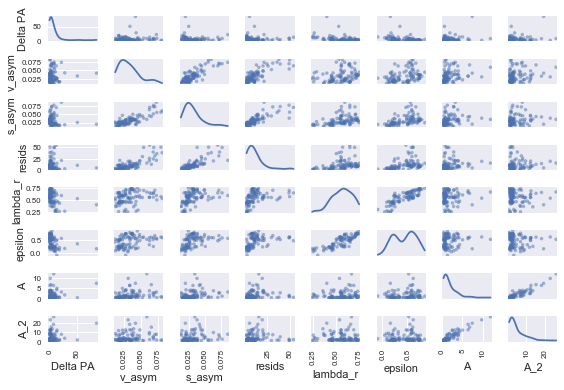

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

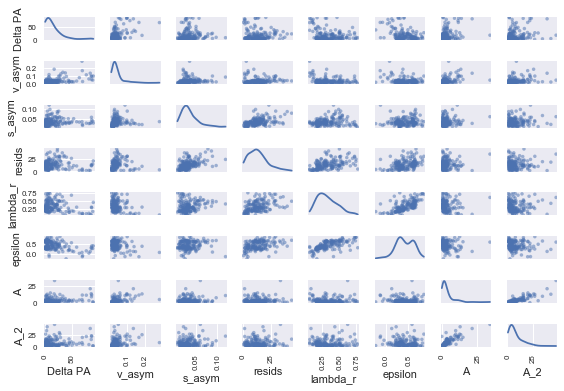

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

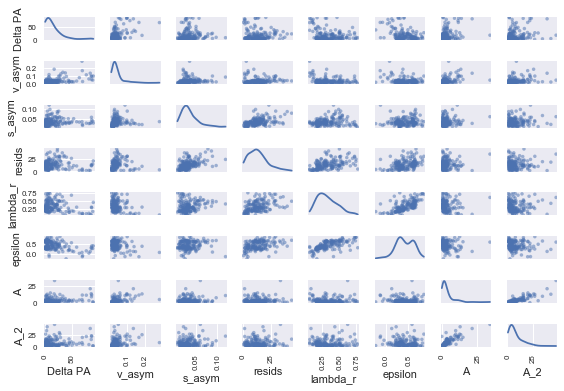

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 1440x288 with 0 Axes>

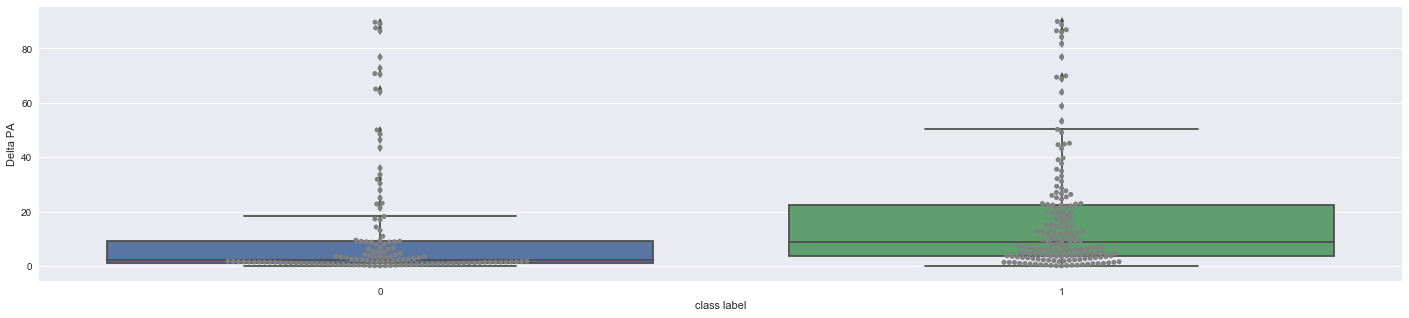

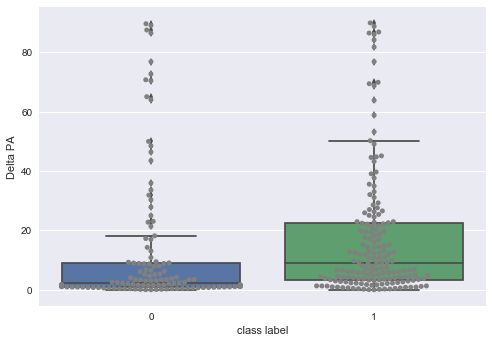

In [9]:
# Usual boxplot
plt.clf()
ax = sns.boxplot(x='class label', y='Delta PA', data=df)

ax = sns.swarmplot(x='class label', y='Delta PA', data=df, color="grey")
plt.show()

plt.clf()
ax = sns.boxplot(x='class label', y='Delta PA', data=df)

ax = sns.swarmplot(x='class label', y='Delta PA', data=df, color="grey")
plt.show()



      class label variable      value
512             0   v_asym   0.010592
729             1   s_asym   0.026438
887             0   s_asym   0.013066
559             0   v_asym   0.023017
357             1   v_asym   0.020169
1168            0   resids  13.389706
380             1   v_asym   0.048069


/Users/beckynevin/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [14]:
print(myr_detect_LDA)#.append(o)
#myr_detect_LDA_val.append(myr[o]))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]


In [9]:
#mean_non=(np.mean(my_lists_merg)+np.mean(my_lists_none))/2
print(mean_non)
print(my_lists_merg)  
print(my_lists_none)

plt.clf()
plt.plot(my_lists,my_lists_merg)
plt.axhline(y=mean_non)
plt.show()
    

0.7167256341993923
[0.2548398116333155, -0.6596324375106156, -0.19953930855118365, 0.3993395405511896, -0.9165219896621929, -0.8766122229002539, 0.48230733025047307, 2.4572433988750175, 0.17972664390058538, 3.093243820499563, -0.19357370300399016, -0.049188848717212914, 0.6023917736543789, 2.508578379098921, 1.7646873580916453, 1.2265276447443163, 1.249237179326522, 1.8045133692681696, 1.2927637100288798, -0.23016328372258174, 1.5085003033739908, 0.8125760850691977, 1.2899230579131087, 1.159712081804382, 0.3930643868639282, 2.652903542477559, 2.531074075622692, 2.794132769174577, 1.7752439925741461, 2.0683114613995253, 1.6764039303332872, 0.9855499334429075, 2.5718787338546854, 1.9725675659928976, 2.82374109991872, 1.851603982940587, 2.3062248315138487, 1.8287980498461172, 2.5214359483896507, 1.8394184633359079, 1.0599140581151323, 1.9046041540953615, 2.0788660244402126, 1.3943292138445171, 1.5913527901584936, 0.6286477745172737, 1.6108303760192682, 1.65277703250091, 1.9689150119621284

ValueError: x and y must have same first dimension, but have shapes (1,) and (153,)